# Q3 Fare Frenzy: Understanding fare, tips, and customer behavior (15 Marks)
## Fare and Tips Overview
**Description:** Examine the relationship between fare, tips, and payment behavior, analyzing any patterns or anomalies. This section should help understand customer behavior and fare distribution.


In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('./TaxiData_fixed.csv')

### 3.a Fare and Tip Distribution (4 Marks):

#### (a) Create histograms and box plots for both fare and tip amounts.

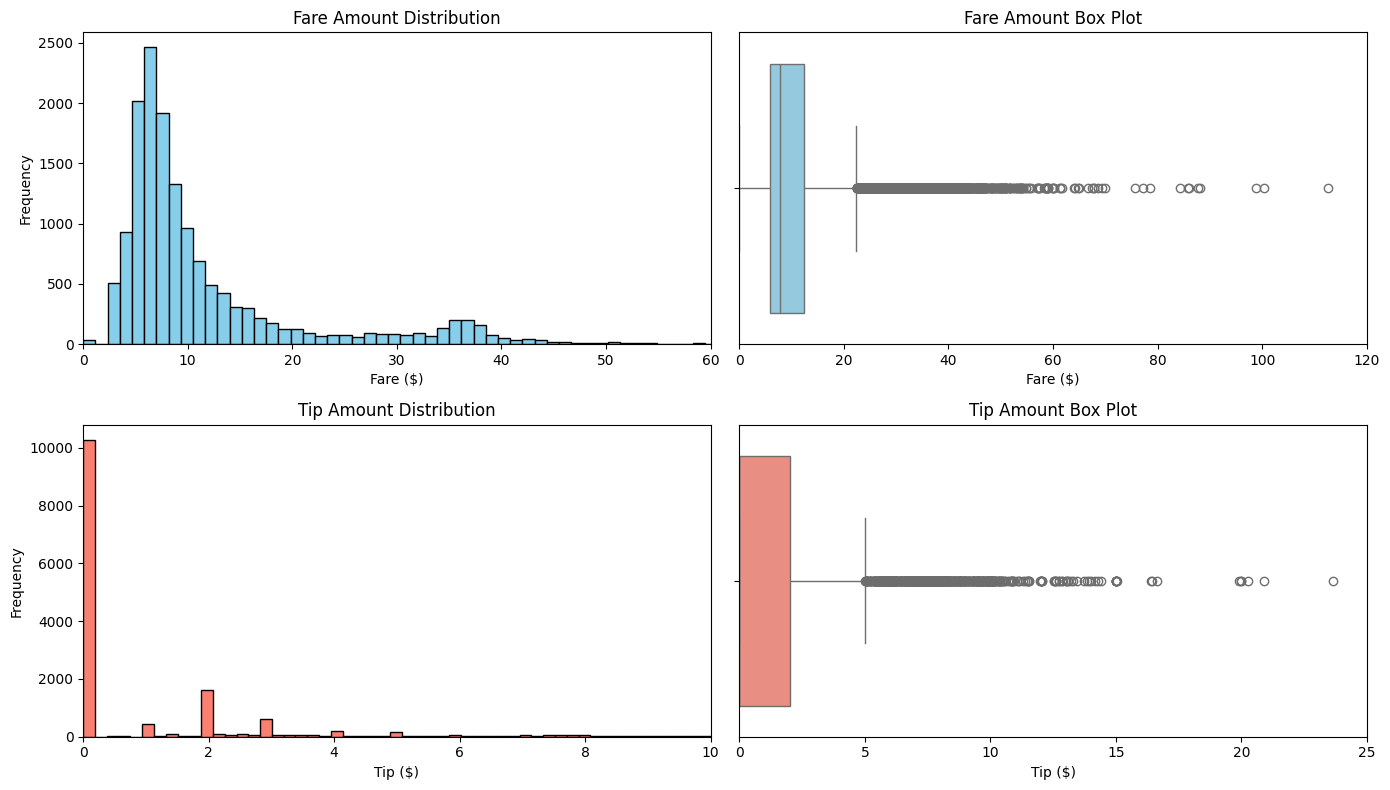

In [2]:
plt.figure(figsize=(14, 8))

# Histogram and Box plot for Fare
plt.subplot(2, 2, 1)
plt.hist(df['fare'], bins=600, color='skyblue', edgecolor='black')
plt.xlim(0, 60)
plt.title('Fare Amount Distribution')
plt.xlabel('Fare ($)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.boxplot(x=df['fare'], color='skyblue')
plt.xlim(0, 120)
plt.title('Fare Amount Box Plot')
plt.xlabel('Fare ($)')

# Histogram and Box plot for Tip
plt.subplot(2, 2, 3)
plt.hist(df['tips'], bins=250, color='salmon', edgecolor='black')
plt.xlim(0, 10)
plt.title('Tip Amount Distribution')
plt.xlabel('Tip ($)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
sns.boxplot(x=df['tips'], color='salmon')
plt.xlim(0, 25)
plt.title('Tip Amount Box Plot')
plt.xlabel('Tip ($)')

plt.tight_layout()
plt.show()

#### (b) Identify the range, outliers, and any clusters in the data.

In [3]:
# Identify the range, outliers, and clusters in the data
fare_range = (df['fare'].min(), df['fare'].max())
tip_range = (df['tips'].min(), df['tips'].max())

fare_range = (round(fare_range[0], 2), round(fare_range[1], 2))
tip_range = (round(tip_range[0], 2), round(tip_range[1], 2))

print("Fare Range:", fare_range)
print("Tip Range:", tip_range)


# Identifying outliers using the IQR method
fare_q1 = df['fare'].quantile(0.25)
fare_q3 = df['fare'].quantile(0.75)
fare_iqr = fare_q3 - fare_q1
fare_outliers = df[(df['fare'] < (fare_q1 - 1.5 * fare_iqr)) | (df['fare'] > (fare_q3 + 1.5 * fare_iqr))]

tip_q1 = df['tips'].quantile(0.25)
tip_q3 = df['tips'].quantile(0.75)
tip_iqr = tip_q3 - tip_q1
tip_outliers = df[(df['tips'] < (tip_q1 - 1.5 * tip_iqr)) | (df['tips'] > (tip_q3 + 1.5 * tip_iqr))]

print("Number of Fare Outliers:", len(fare_outliers))
print("Number of Tip Outliers:", len(tip_outliers))


# Identifying clusters using K-means clustering
from sklearn.cluster import KMeans

# Clustering for Fare
fare_data = df['fare'].values.reshape(-1, 1)
fare_kmeans = KMeans(n_clusters=3, random_state=0).fit(fare_data)
fare_clusters = fare_kmeans.cluster_centers_

# Clustering for Tip
tip_data = df['tips'].values.reshape(-1, 1)
tip_kmeans = KMeans(n_clusters=3, random_state=0).fit(tip_data)
tip_clusters = tip_kmeans.cluster_centers_

print("Fare Clusters:", fare_clusters)
print("Tip Clusters:", tip_clusters)

Fare Range: (np.float64(0.0), np.float64(700.07))
Tip Range: (np.float64(0.0), np.float64(47.0))
Number of Fare Outliers: 1872
Number of Tip Outliers: 839
Fare Clusters: [[  8.33427151]
 [ 34.72279855]
 [700.07      ]]
Tip Clusters: [[2.64989669]
 [8.19261084]
 [0.04832624]]


#### (c) Interpretation: Provide a statistical summary(mean, median, standard deviation,), and analyze any patterns in fare and tipping  behavior, such as outliers or clusters in high or low values.

In [4]:
# Statistical Summary of Fare
fare_mean = df['fare'].mean()
fare_median = df['fare'].median()
fare_mode = df['fare'].mode()[0]
fare_std = df['fare'].std()

print("Fare Mean:", round(fare_mean, 2))
print("Fare Median:", round(fare_median, 2))
print("Fare Mode:", round(fare_mode, 2))
print("Fare Standard Deviation:", round(fare_std, 2))


# Statistical Summary of Tips
tip_mean = df['tips'].mean()
tip_median = df['tips'].median()
tip_mode = df['tips'].mode()[0]
tip_std = df['tips'].std()

print("Tip Mean:", round(tip_mean, 2))
print("Tip Median:", round(tip_median, 2))
print("Tip Mode:", round(tip_mode, 2))
print("Tip Standard Deviation:", round(tip_std, 2))

Fare Mean: 11.77
Fare Median: 7.85
Fare Mode: 3.25
Fare Standard Deviation: 11.54
Tip Mean: 1.08
Tip Median: 0.0
Tip Mode: 0.0
Tip Standard Deviation: 2.16


The analysis reveals that most rides are low-cost, with a significant portion of fares clustered around a modest range, although a few high-value fares create substantial variability. Tipping behavior is generally minimal, with many passengers opting not to tip, as indicated by both the median and mode being zero. However, there are distinct tipping clusters, showing that a smaller group of riders does tip more generously, likely in association with higher fares or longer rides. Overall, the data suggests that low-cost fares are common, and tipping is infrequent, with generous tipping reserved for higher-cost trips.

### 3.b Payment Method Insights (3 Marks):

#### (a) Visualize the frequency of each payment method using bar charts or pie charts.

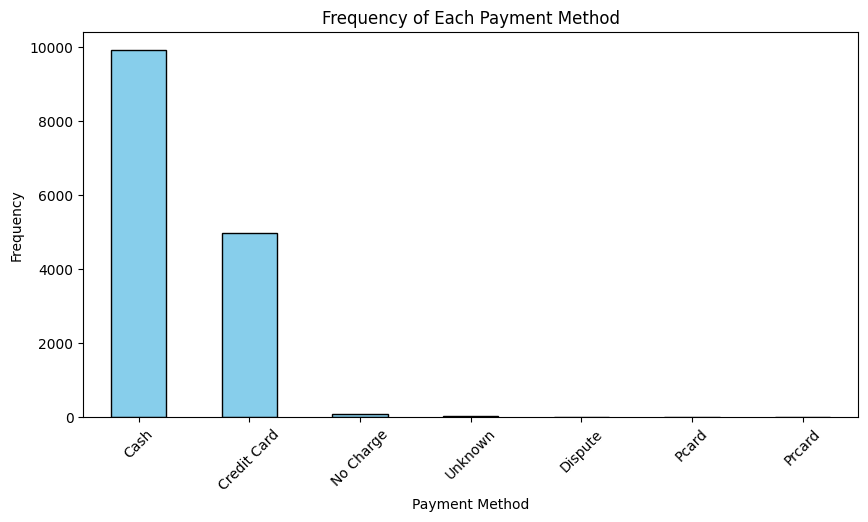

In [5]:
payment_counts = df['payment_type'].value_counts()

# Bar Chart
plt.figure(figsize=(10, 5))
payment_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Each Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

#### (b) Interpretation: Identify any dominant payment methods and discuss how this may impact service providers

The data shows that cash and credit card payments dominate, with 9,909 rides paid in cash and 4,975 by credit card, together comprising nearly all transactions. The minimal use of other payment types (No Charge, Unknown, Dispute, and card variants) suggests they have little impact on overall payment trends. The dominance of cash and credit card payments has significant implications for service providers. Cash transactions require drivers to handle and store physical money, which can introduce security concerns and logistical issues. Credit card payments, however, offer a more streamlined and secure way to handle fares, potentially leading to quicker, more reliable payments. Encouraging digital payments could reduce cash handling, improve transaction accuracy, and enhance convenience for both drivers and passengers.

### 3.c Tips by Payment Method (3 Marks):

#### (a) Create a box plot to compare tips across different payment methods.

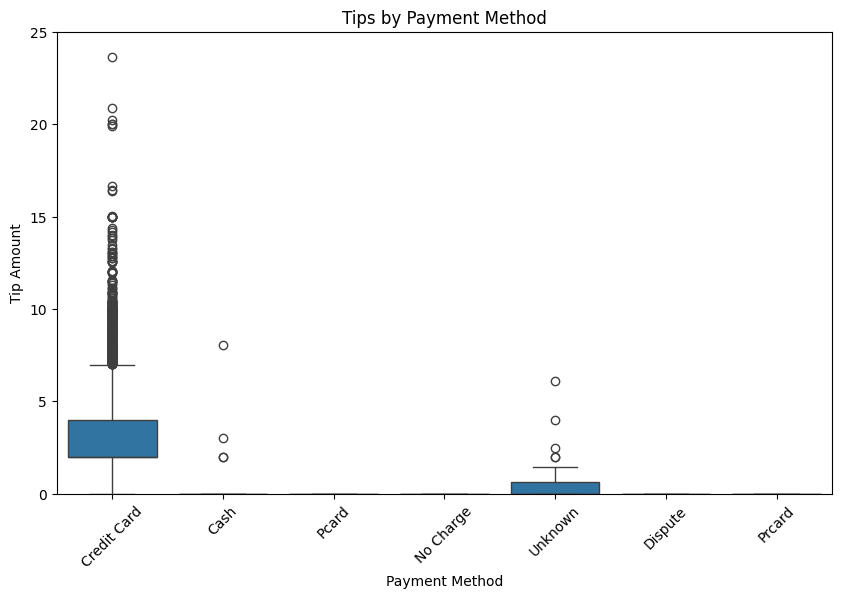

In [6]:
tip_counts = df['tips'].value_counts()
# box plot to compare the tips by different payment methods using tip counts
plt.figure(figsize=(10, 6))
sns.boxplot(x='payment_type', y='tips', data=df)
plt.ylim(0, 25)
plt.title('Tips by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Tip Amount')
plt.xticks(rotation=45)
plt.show()

#### (b) Interpretation: Summarize the average tipping amounts for each method and analyze variations.

The plot indicates that credit card payments are associated with the highest average tips, with most tips falling between $2 and $3, and some outliers reaching over $20. This suggests that credit card users tend to tip more frequently and in larger amounts, likely due to the convenience of adding a tip digitally. In contrast, cash payments show much lower tipping levels, with most tips close to zero and only a few notable outliers, indicating that cash transactions generally result in lower tipping amounts. Other payment methods, such as No Charge, Pcard, Prcard, Dispute, and Unknown, show minimal or nearly nonexistent tipping, with only occasional outliers, particularly in the Unknown category. Overall, credit card payments lead to higher average tips, which suggests that service providers may benefit from encouraging digital payment options to increase tipping rates.

### 3.d Fare vs. Distance (5 Marks):

#### (a) Plot a scatter plot showing the relationship between trip distance and fare.

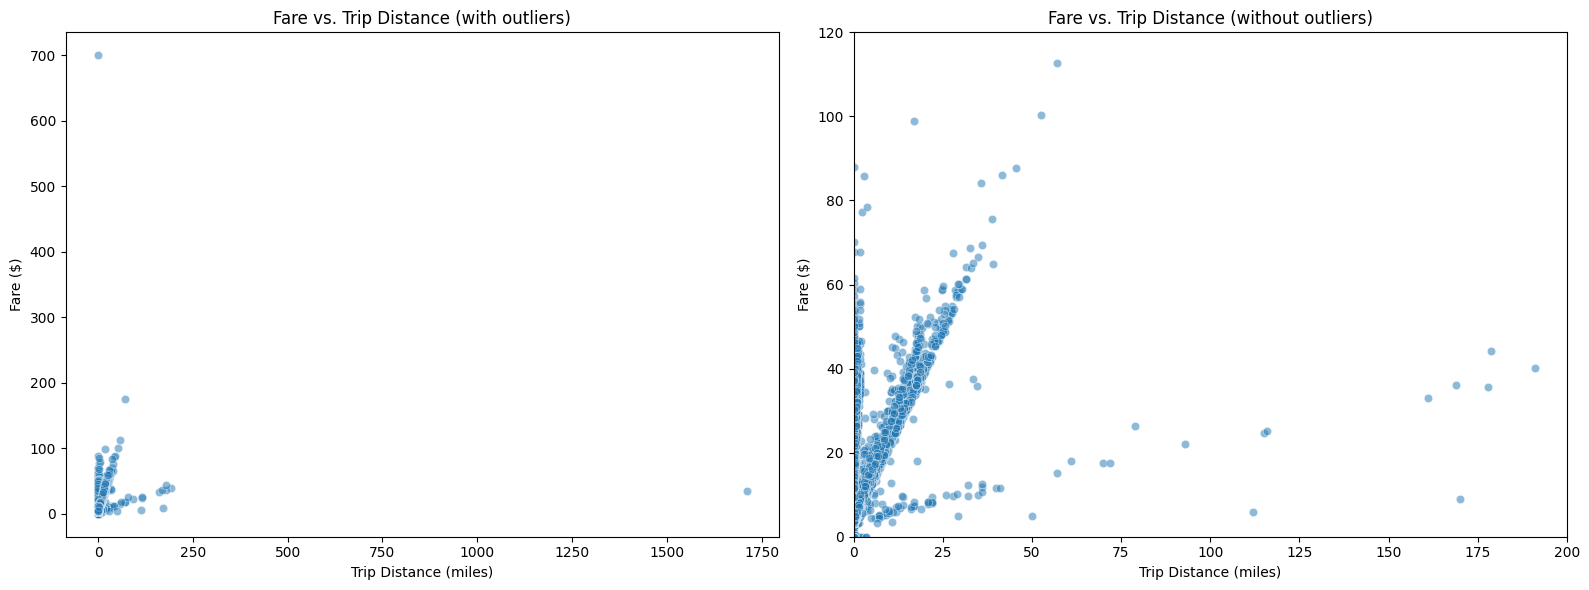

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

#with outliers
sns.scatterplot(x='trip_miles', y='fare', data=df, alpha=0.5, ax=ax1)
ax1.set_title('Fare vs. Trip Distance (with outliers)')
ax1.set_xlabel('Trip Distance (miles)')
ax1.set_ylabel('Fare ($)')

#without outliers
sns.scatterplot(x='trip_miles', y='fare', data=df, alpha=0.5, ax=ax2)
ax2.set_xlim(0, 200)
ax2.set_ylim(0, 120)
ax2.set_title('Fare vs. Trip Distance (without outliers)')
ax2.set_xlabel('Trip Distance (miles)')
ax2.set_ylabel('Fare ($)')

plt.tight_layout()
plt.show()

#### (b) Calculate and interpret the correlation coefficient between the two variables.

In [8]:
correlation_coefficient = np.corrcoef(df['trip_miles'], df['fare'])[0, 1]
print(f"Correlation coefficient between fare and trip distance: {correlation_coefficient:.2f}")

# correlation after removing outliers
df_no_outliers = df[(df['fare'] >= (fare_q1 - 1.5 * fare_iqr)) & (df['fare'] <= (fare_q3 + 1.5 * fare_iqr))]
correlation_coefficient_no_outliers = np.corrcoef(df_no_outliers['trip_miles'], df_no_outliers['fare'])[0, 1]
print(f"Correlation coefficient between fare and trip distance (without outliers): {correlation_coefficient_no_outliers:.2f}")

Correlation coefficient between fare and trip distance: 0.22
Correlation coefficient between fare and trip distance (without outliers): 0.40


#### (c) Interpretation: Explain any findings on the fare-distance relationship and outline any potential implications for fare pricing.

The analysis indicates a weak positive relationship between fare and trip distance, with a correlation coefficient of 0.22. This means that fares do not consistently increase in proportion to distance, and other factors likely play a significant role in determining fare. When outliers are removed, the correlation coefficient rises to 0.40, suggesting a moderately stronger relationship between fare and distance for typical trips. This improvement implies that outliers—such as trips with exceptionally high fares or long distances—are distorting the relationship and weakening the correlation in the full dataset. Without these extreme cases, distance becomes a somewhat more reliable predictor of fare, though variability remains.

Given these findings, a multi-factor pricing model that incorporates other variables, such as demand, time of day, and traffic conditions, would likely be more accurate than relying on distance alone, especially when outliers are present. Managing extreme cases separately could help improve pricing consistency for standard trips, providing a clearer fare-distance relationship. To improve customer satisfaction, it would also be beneficial to communicate the factors influencing fare to set realistic expectations. A refined pricing model that aligns fares more closely with typical trip conditions could optimize profitability by balancing distance-based pricing with dynamic adjustments.